In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing data

fake = "https://raw.githubusercontent.com/Shacham-R/fake_news_detector/main/data/Fake.csv"
true = "https://raw.githubusercontent.com/Shacham-R/fake_news_detector/main/data/True.csv"

df_fake = pd.read_csv(fake)
df_real = pd.read_csv(true)

# EDA

## Data cleaning of df_fake

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake['subject'].unique() #It's all news, this column doesn't add anything

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [ ]:
df_fake = df_fake[['title','text']]

In [ ]:
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [ ]:
df_fake['title_text'] = df_fake['title'] +' '+ df_fake['text']

In [ ]:
df_fake_clean = df_fake[['title_text']]

In [ ]:
df_fake_clean['fake'] = 1

In [ ]:
df_fake_clean.head()

,title_text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


### Data Cleaning for df_real

In [ ]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#TODO remove CITY(newspaper) from df_real['text']
df_real['text'] = df_real['text'].str.extract(r"- (.*)", expand=False)


In [ ]:
df_real['text'].head()

0    The head of a conservative Republican faction ...
1    Transgender people will be allowed for the fir...
2    The special counsel investigation of links bet...
3    Trump campaign adviser George Papadopoulos tol...
4    President Donald Trump called on the U.S. Post...
Name: text, dtype: object

In [ ]:
df_real = df_real[['title','text']]

In [ ]:
df_real.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...


In [ ]:
df_real['title_text'] = df_real['title'] +' '+ df_real['text']

In [ ]:
df_real_clean = df_real[['title_text']]

In [ ]:
df_real_clean['fake'] = 0

In [ ]:
df_real_clean.head()

,title_text,fake
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0


## Dataframes merging

In [ ]:
df = pd.concat([df_real_clean,df_fake_clean])

In [ ]:
df = df.sample(frac=1)

In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
df

,title_text,fake
0,"EU readies sanctions on Venezuela, approves ar...",0
1,PUTIN PUSHES His Own Reset Button With America...,1
2,Trump Throws Colossal Tantrum After America F...,1
3,THE DEATH OF P.C. POLICE? Trump’s DOJ Makes Ma...,1
4,MEDIA WON’T SHOW VIDEO Of Trump Telling Matt L...,1
...,...,...
44893,Ryan: Trump made right decision to seek Flynn ...,0
44894,What Donald Trump Did On The Golf Course Is P...,1
44895,Democrats see budget fight as chance to force ...,0
44896,Mexico women protest violence in skeletal Day ...,0


# Preprocessing

In [ ]:
# Lemmatization

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.data.path.append('/root/nltk_data/corpora/')

In [ ]:
stop_words = stopwords.words('english')
print(stop_words) # some words I like to remove are not included

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
new_words = ['said','like','year','would','house','also','sends']
stop_words.extend(new_words)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#TODO count the words

In [ ]:
df['title_text'] = df['title_text'].astype(str)

In [ ]:
df['token_text'] = df['title_text'].apply(lambda x: nltk.word_tokenize(x))
df['token_text']

0        [EU, readies, sanctions, on, Venezuela, ,, app...
1        [PUTIN, PUSHES, His, Own, Reset, Button, With,...
2        [Trump, Throws, Colossal, Tantrum, After, Amer...
3        [THE, DEATH, OF, P.C, ., POLICE, ?, Trump, ’, ...
4        [MEDIA, WON, ’, T, SHOW, VIDEO, Of, Trump, Tel...
                               ...                        
44893    [Ryan, :, Trump, made, right, decision, to, se...
44894    [What, Donald, Trump, Did, On, The, Golf, Cour...
44895    [Democrats, see, budget, fight, as, chance, to...
44896    [Mexico, women, protest, violence, in, skeleta...
44897    [Hatred, For, The, Republican, Party, Reaches,...
Name: token_text, Length: 44898, dtype: object

In [ ]:
# Count all words in the data
list_words = []
for i in df.token_text:
    for w in i:
        list_words.append(w)

In [ ]:
num_words = len(list(set(list_words)))
num_words

262302

In [ ]:
# Create function to automatically lemmatization and remove stopwords
def lemmatization_and_stopwords(text):
    clean_text = []
    # Set all text into lowercase to match the stopwords
    text = text.lower()
    # Tokenize the text before processing
    tokens = nltk.word_tokenize(text)
    lemmatizer = nltk.WordNetLemmatizer()

    for token in tokens:
        if token not in stop_words and len(token)>3:
            token = lemmatizer.lemmatize(token)
            clean_text.append(token)

    text = " ".join(clean_text)

    return text

In [ ]:
df['title_text'] = df['title_text'].apply(lemmatization_and_stopwords)

## Statistical Analysis of the word frequency

In [ ]:
df_real_clean['title_text'] = df_real_clean['title_text'].astype(str)
df_fake_clean['title_text'] = df_fake_clean['title_text'].astype(str)
df_real_clean['title_text'] = df_real_clean['title_text'].apply(lemmatization_and_stopwords)
df_fake_clean['title_text'] = df_fake_clean['title_text'].apply(lemmatization_and_stopwords)

In [ ]:
from collections import Counter
results_real = Counter()
df_real_clean['title_text'].str.lower().str.split().apply(results_real.update)
word_count_real = pd.DataFrame.from_dict(results_real, orient='index').reset_index()
word_count_real = word_count_real.rename(columns={'index':'word', 0:'count'})
word_count_real.head()

,word,count
0,u.s.,42249
1,budget,3860
2,fight,2494
3,loom,105
4,republican,23028


In [ ]:
word_count_real.drop(word_count_real[word_count_real['count'] < 100].index, inplace=True)
word_count_real.reset_index(inplace=True, drop=True)
word_count_real.sort_values(by=['count','word'],ascending=False,inplace=True)
word_count_real.head(10)

,word,count
61,trump,59481
0,u.s.,42249
111,state,36965
59,president,27295
4,republican,23028
90,government,19823
110,united,15389
97,party,15346
93,people,15275
274,official,15072


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'u.s.'),
  Text(1, 0, 'state'),
  Text(2, 0, 'president'),
  Text(3, 0, 'republican'),
  Text(4, 0, 'government'),
  Text(5, 0, 'united'),
  Text(6, 0, 'party'),
  Text(7, 0, 'people'),
  Text(8, 0, 'official'),
  Text(9, 0, 'election')])

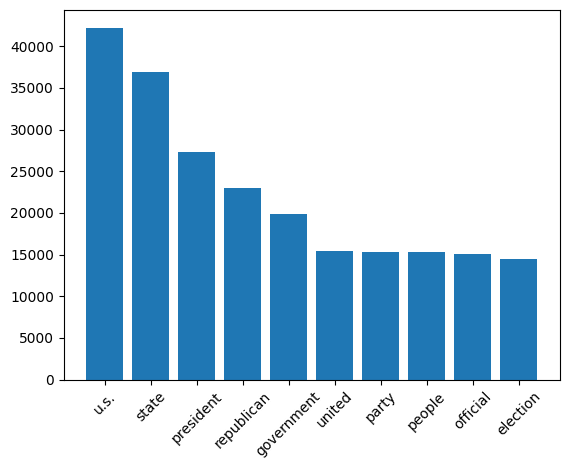

In [ ]:
top_10 = word_count_real[1:11]
plt.bar(top_10.word, top_10['count'])
plt.xticks(rotation = 45)

In [ ]:
results_fake = Counter()
df_fake_clean['title_text'].str.lower().str.split().apply(results_fake.update)
word_count_fake = pd.DataFrame.from_dict(results_fake, orient='index').reset_index()
word_count_fake = word_count_fake.rename(columns={'index':'word', 0:'count'})
word_count_fake.head()

,word,count
0,donald,18078
1,trump,83108
2,embarrassing,620
3,message,2853
4,disturbing,635


In [ ]:
word_count_fake.drop(word_count_fake[word_count_fake['count'] < 100].index, inplace=True)
word_count_fake.reset_index(inplace=True, drop=True)
word_count_fake.sort_values(by=['count','word'],ascending=False, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'trump'),
  Text(1, 0, 'president'),
  Text(2, 0, 'people'),
  Text(3, 0, 'state'),
  Text(4, 0, 'obama'),
  Text(5, 0, 'clinton'),
  Text(6, 0, 'time'),
  Text(7, 0, 'donald'),
  Text(8, 0, 'video'),
  Text(9, 0, 'republican')])

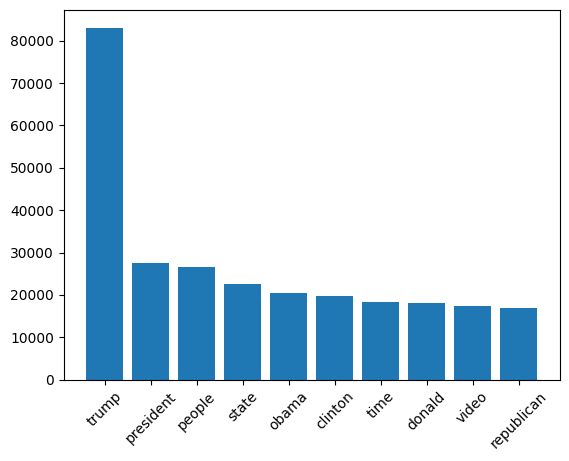

In [ ]:

top_10_f = word_count_fake[0:10]
plt.bar(top_10_f.word, top_10_f['count'])
plt.xticks(rotation = 45)

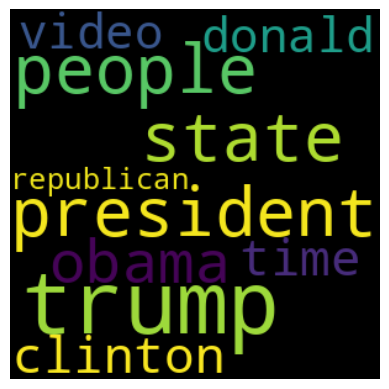

In [ ]:
from wordcloud import WordCloud

text = ' '.join(list(top_10_f.word))

wc = WordCloud(width = 300, height = 300).generate(text)

# Remove the axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

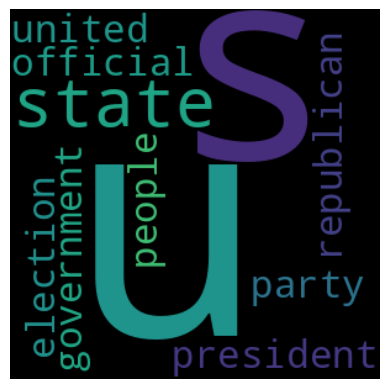

In [ ]:
text = ' '.join(list(top_10.word))

wc = WordCloud(width = 300, height = 300).generate(text)

# Remove the axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

## X,y split

In [ ]:
# Split the data into feature and label
X = df['title_text'].values
y = df['fake'].values

# Split the data into train and validation data using train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
# Create a tokenizer variable
tokenizer = Tokenizer(num_words=num_words, oov_token='*')

# Apply tokenizer to X_train and X_valid
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_valid)

In [ ]:
# Create text sequences
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_valid = tokenizer.texts_to_sequences(X_valid)

# Create text padding on post
padding_train = pad_sequences(sequence_train,
                              maxlen=100,
                              padding='post',
                              truncating='post'
                             )

padding_valid = pad_sequences(sequence_valid,
                              maxlen=100,
                              padding='post',
                              truncating='post'
                             )

# Models

In [ ]:
vectorizer = TfidfVectorizer()
Z = X
Z = vectorizer.fit_transform(Z)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
np.random.choice(feature_names, 5)

array(['usss', 'fox13', 'scraper', '___2', 'ionian'], dtype=object)

In [ ]:
print(Z.shape)

(44898, 114454)


In [ ]:
RAND_STATE = 42 # for reproducible shuffling
TT_RATIO = 0.25 # test/train

### Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

Z_train, Z_test, J_train, J_test = train_test_split(Z, y, test_size=TT_RATIO, random_state=RAND_STATE)

# Bear in mind that sklearn uses a different function for decission trees used for
# classification ( to predict a categorical feature ): DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=50,min_samples_split=80)

model.fit(Z_train, J_train)

J_pred_train_dt = model.predict(Z_train)
J_pred_test_dt = model.predict(Z_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(J_train, J_pred_train_dt),
                                         precision_score(J_train, J_pred_train_dt),
                                         recall_score(J_train, J_pred_train_dt)],
                               'Test': [accuracy_score(J_test, J_pred_test_dt),
                                        precision_score(J_test, J_pred_test_dt),
                                        recall_score(J_test, J_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.655451,0.641069
1,Precision,0.799779,0.787397
2,Recall,0.453252,0.435680


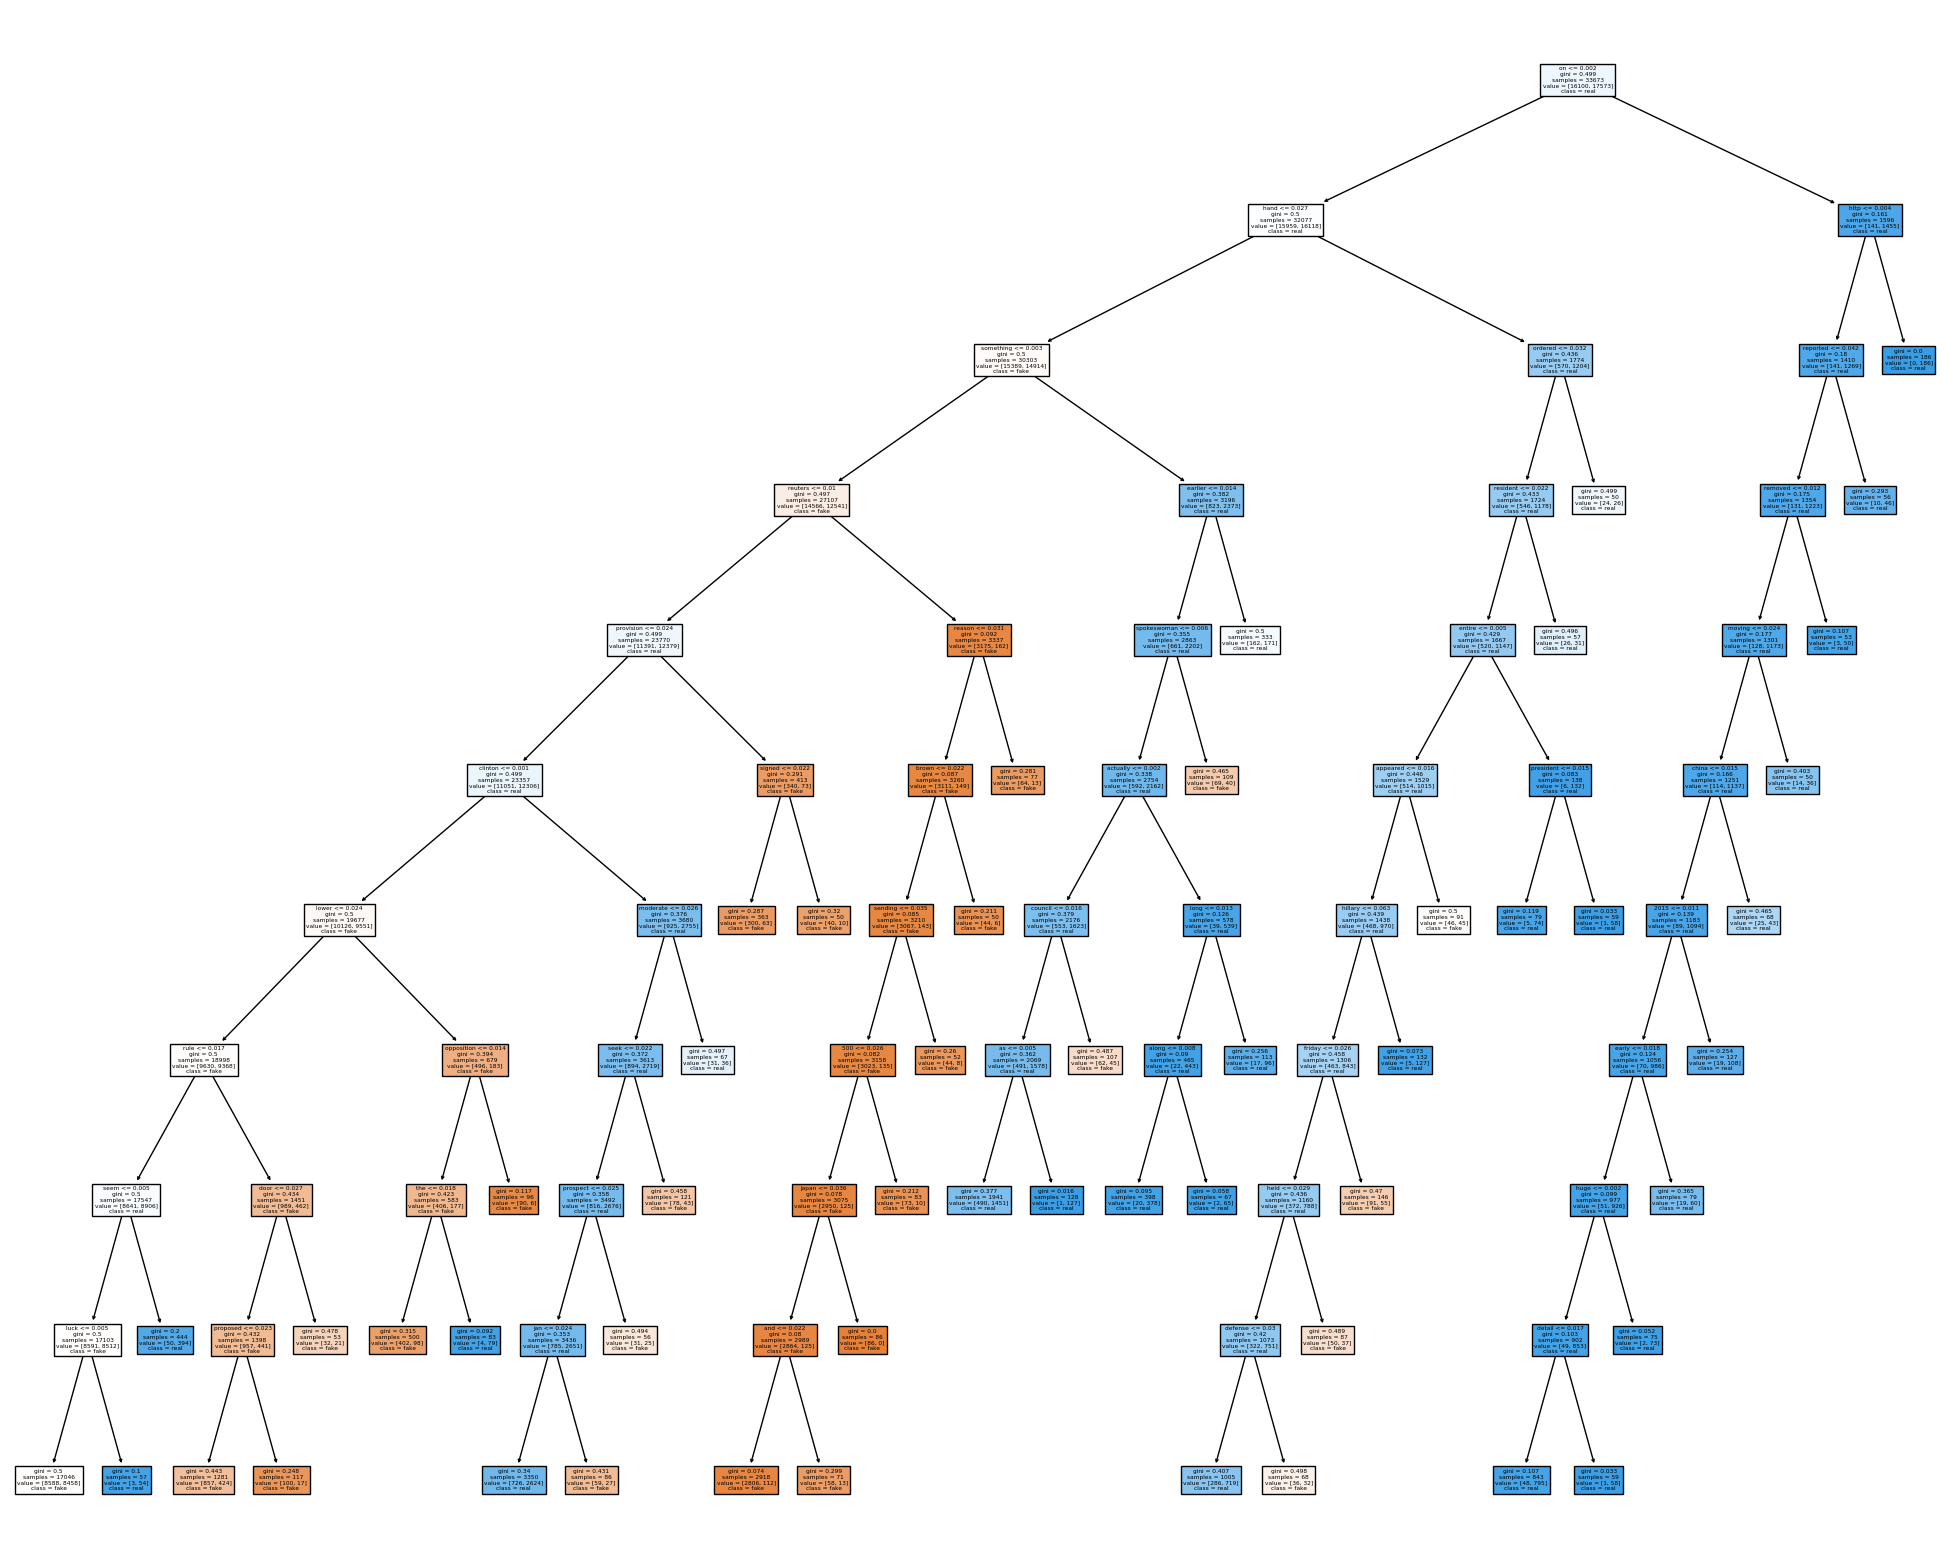

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=feature_names,
                   class_names=['fake','real'],
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [80],
    'min_samples_leaf' : [50],
    'max_features': ['sqrt'],
    ##'max_samples' : ['None', 0.5],
   'max_depth':[3,5]
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=RAND_STATE)

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [ ]:
grid_search.fit(Z_train,J_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [50], 'min_samples_split': [80],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [ ]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 80,
 'n_estimators': 100}

In [ ]:
grid_df = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_train_score',ascending=False)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=RAND_STATE, **best_params)
cross_val_scores = cross_val_score(clf, Z_train, J_train, cv=5)
print(np.mean(cross_val_scores))

0.8970690193852778


### Feature Importance

In [ ]:
clf.fit(Z_train, J_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=80,
                       random_state=42)

In [ ]:
feature_names_importance = {}
for name, importance in zip(feature_names, clf.feature_importances_):
  if importance > 0:
    feature_names_importance[name] = importance

In [ ]:
fn_df = pd.DataFrame.from_dict(feature_names_importance,orient='index')
fn_df.reset_index(inplace=True)
fn_df.rename(columns={'index':'word',0:'importance'},inplace=True)
fn_df.sort_values(by=['importance','word'],ascending=False,inplace=True)
fn_df.head()

,word,importance
116,com,0.020368
477,racist,0.016223
679,wire,0.015287
639,twitter,0.014610
381,minister,0.014122
